In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import pandas as pd
from glob import glob
import random
random.seed(8675309)

# define function to files
def load_files(path):
    data = np.array(glob(path))
    return data

#import all image categories and files into dictionary
print('------------------------------')
print('**Importing Training Data**')

train_images_cat = {}
total_images = 0
for i in range(0,10):
    index = "c" + str(i)
    folderName = 'imgs/train/' + index + '/*'
    train_images_cat[index] = load_files(folderName)
    total_images += len(train_images_cat[index])
    print('There are %d total images in category %s.' % (len(train_images_cat[index]), index))
    
print('There are %d total images.' % total_images)

#condense dictionary into array of tubles
train_data = []
for i in train_images_cat:
    for j in train_images_cat[i]:
        train_data.append((i, j))
print()
print('Sample format of train data. label and filepath.\n', train_data[0])
print('------------------------------')
print()

'''
#import testing data. testing data info is in excel file containing label and image name
#create tuple of (label, img_path) to pass onto next step
print('------------------------------')
print('**Importing Testing Data**')
testing_sheet = pd.read_csv("driver_imgs_list.csv/driver_imgs_list.csv")
testing_sheet = testing_sheet.drop(columns=['subject'])
test_data = []
for i in testing_sheet.iterrows():
    test_data.append( (i[1]['classname'], 'imgs/test/' + i[1]['img']) )

print('There are %d total testing images.' % len(test_data))  
print('Sample format of test data. label and filepath.\n', test_data[0])
print('------------------------------')
print()
'''
    
    
#shuffle list of tuples
random.shuffle(train_data)   


  

Using TensorFlow backend.


------------------------------
**Importing Training Data**
There are 2489 total images in category c0.
There are 2267 total images in category c1.
There are 2317 total images in category c2.
There are 2346 total images in category c3.
There are 2326 total images in category c4.
There are 2312 total images in category c5.
There are 2325 total images in category c6.
There are 2002 total images in category c7.
There are 1911 total images in category c8.
There are 2129 total images in category c9.
There are 22424 total images.

Sample format of train data. label and filepath.
 ('c2', 'imgs/train/c2\\img_100029.jpg')
------------------------------



('c3', 'imgs/train/c3\\img_36150.jpg')


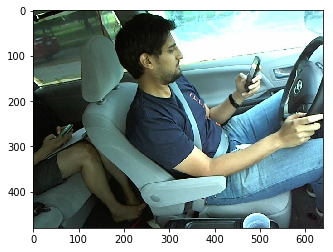

In [80]:
import cv2                
import matplotlib.pyplot as plt

#import images from filenames

def load_images(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #convert to greyscale option
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    #display image
    plt.imshow(img)
    plt.show

print(train_data[0])
load_images(train_data[0][1])



In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def create4DTensor(img_path):
    # load image
    img = image.load_img(img_path, target_size=(224, 224))
    # convert image to 3d tensor
    img3d = image.img_to_array(img)
    # convert to 4d tensor
    return np.expand_dims(img3d, axis=0)

def processImages(data):
    tensors= []
    targets = []
    for i in tqdm(data):
        tensor = create4DTensor(i[1])
        target = i[0]

        tensors.append(tensor)
        targets.append(target)
    return tensors, targets




#-------------------------------------------------------------------------------

#split data into training, validation, and testing
training_data = train_data[:3500]
validation_data = train_data[3501:4000]
testing_data = train_data[4000:4500]

train_images, train_targets = processImages(training_data)
valid_images, valid_targets = processImages(validation_data)
test_images, test_targets = processImages(testing_data)



train_images = np.vstack(train_images).astype('float32')/255
valid_images = np.vstack(valid_images).astype('float32')/255
test_images = np.vstack(test_images).astype('float32')/255


for i in range(0,len(train_targets)):
    train_targets[i]= train_targets[i][1:]
for i in range(0,len(valid_targets)):
    valid_targets[i]= valid_targets[i][1:]
for i in range(0,len(test_targets)):
    test_targets[i]= test_targets[i][1:]
    
train_targets = np_utils.to_categorical(np.array(train_targets), 10)
valid_targets = np_utils.to_categorical(np.array(valid_targets), 10)
test_targets = np_utils.to_categorical(np.array(test_targets), 10)

#-------------------------------------------------------------------------------
#Use section above for smaller train/test. Use section below for batch training
#-------------------------------------------------------------------------------
'''
validation_data = train_data[:2000] 
testing_data = train_data[2000:4000]

valid_images, valid_targets = processImages(validation_data)
test_images, test_targets = processImages(testing_data)

valid_images = np.vstack(valid_images).astype('float32')/255
test_images = np.vstack(test_images).astype('float32')/255

for i in range(0,len(valid_targets)):
    valid_targets[i]= valid_targets[i][1:]
for i in range(0,len(test_targets)):
    test_targets[i]= test_targets[i][1:]
    
valid_targets = np_utils.to_categorical(np.array(valid_targets), 10)
test_targets = np_utils.to_categorical(np.array(test_targets), 10)    

train_data = train_data[4001:]  

#reset training data to original
originalTrainData = list(train_data)
def resetTrainData():
    return list(originalTrainData)

def generator(input_data, batch_size = 50):
    while True:
        batch_data = []
        for index in range(batch_size):
            i = random.randrange(0, len(input_data))
            batch_data.append(input_data[i])
            del input_data[i]
        train_images, train_targets = processImages(batch_data)
        train_images = np.vstack(train_images).astype('float32')/255
        for i in range(0,len(train_targets)):
            train_targets[i]= train_targets[i][1:]
        train_targets = np_utils.to_categorical(np.array(train_targets), 10)

        yield train_images, train_targets
            
#-------------------------------------------------------------------------------
'''

100%|██████████| 500/500 [00:08<00:00, 60.31it/s]


"\nvalidation_data = train_data[:2000] \ntesting_data = train_data[2000:4000]\n\nvalid_images, valid_targets = processImages(validation_data)\ntest_images, test_targets = processImages(testing_data)\n\nvalid_images = np.vstack(valid_images).astype('float32')/255\ntest_images = np.vstack(test_images).astype('float32')/255\n\nfor i in range(0,len(valid_targets)):\n    valid_targets[i]= valid_targets[i][1:]\nfor i in range(0,len(test_targets)):\n    test_targets[i]= test_targets[i][1:]\n    \nvalid_targets = np_utils.to_categorical(np.array(valid_targets), 10)\ntest_targets = np_utils.to_categorical(np.array(test_targets), 10)    \n\ntrain_data = train_data[4001:]  \n\n#reset training data to original\noriginalTrainData = list(train_data)\ndef resetTrainData():\n    return list(originalTrainData)\n\ndef generator(input_data, batch_size = 50):\n    while True:\n        batch_data = []\n        for index in range(batch_size):\n            i = random.randrange(0, len(input_data))\n          

In [83]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential, Model

model = Sequential()

model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(GlobalAveragePooling2D())
          
model.add(Dropout(0.1))          
model.add(Dense(10, activation='softmax'))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 220, 220, 4)       304       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 4)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 106, 106, 16)      1616      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 49, 49, 32)        12832     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
__________

In [84]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  

epochs = 30

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=100, callbacks=[checkpointer, earlystopper], verbose=2)

Train on 3500 samples, validate on 499 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 2.30265, saving model to saved_models/weights.best.from_scratch.hdf5
16s - loss: 2.3048 - acc: 0.1094 - val_loss: 2.3026 - val_acc: 0.1102
Epoch 2/30
Epoch 00001: val_loss improved from 2.30265 to 2.29945, saving model to saved_models/weights.best.from_scratch.hdf5
12s - loss: 2.3017 - acc: 0.1037 - val_loss: 2.2995 - val_acc: 0.0882
Epoch 3/30
Epoch 00002: val_loss did not improve
12s - loss: 2.2991 - acc: 0.1114 - val_loss: 2.3006 - val_acc: 0.0882
Epoch 4/30
Epoch 00003: val_loss improved from 2.29945 to 2.29677, saving model to saved_models/weights.best.from_scratch.hdf5
12s - loss: 2.2969 - acc: 0.1089 - val_loss: 2.2968 - val_acc: 0.1142
Epoch 5/30
Epoch 00004: val_loss improved from 2.29677 to 2.29335, saving model to saved_models/weights.best.from_scratch.hdf5
12s - loss: 2.2949 - acc: 0.1211 - val_loss: 2.2934 - val_acc: 0.1583
Epoch 6/30
Epoch 00005: val_loss improved from 2.2

In [85]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

# get index of predicted dog breed for each image in test set
distracted_driver_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

# report test accuracy
test_accuracy = 100*np.sum(np.array(distracted_driver_predictions)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 30.8000%


In [89]:
print(test_targets[0])
print(model.predict(np.expand_dims(test_images[0], axis=0)))

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.15588532  0.14716297  0.07078248  0.21618374  0.14734071  0.01396769
   0.08366183  0.03734739  0.05895158  0.06871618]]


In [8]:
#With a test accuracy of 30.8 % we are doing better than random chance since we have 10 different categories. (1/10 = 10%)

In [76]:
#model attemp 2

model = Sequential()

model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(4, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))   
model.add(Dense(10, activation='softmax'))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
dropout_10 (Dropout)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 4)       304       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 4)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 106, 106, 16)      1616      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 49, 49, 32)        12832     
__________

In [77]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  


epochs = 30


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_v2.hdf5', 
                               verbose=1, save_best_only=True)

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=100, callbacks=[checkpointer, earlystopper], verbose=2)

Train on 3500 samples, validate on 499 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 2.01683, saving model to saved_models/weights.best.from_scratch_v2.hdf5
17s - loss: 2.3347 - acc: 0.2494 - val_loss: 2.0168 - val_acc: 0.4309
Epoch 2/30
Epoch 00001: val_loss improved from 2.01683 to 1.24215, saving model to saved_models/weights.best.from_scratch_v2.hdf5
16s - loss: 0.9647 - acc: 0.6974 - val_loss: 1.2421 - val_acc: 0.7856
Epoch 3/30
Epoch 00002: val_loss improved from 1.24215 to 0.81343, saving model to saved_models/weights.best.from_scratch_v2.hdf5
16s - loss: 0.3500 - acc: 0.8909 - val_loss: 0.8134 - val_acc: 0.8357
Epoch 4/30
Epoch 00003: val_loss improved from 0.81343 to 0.36832, saving model to saved_models/weights.best.from_scratch_v2.hdf5
16s - loss: 0.1724 - acc: 0.9480 - val_loss: 0.3683 - val_acc: 0.9359
Epoch 5/30
Epoch 00004: val_loss improved from 0.36832 to 0.21869, saving model to saved_models/weights.best.from_scratch_v2.hdf5
16s - loss: 0.0935 - acc: 0

In [12]:
model.load_weights('saved_models/weights.best.from_scratch_v2.hdf5')

# get index of predicted dog breed for each image in test set
distracted_driver_predictions_v2 = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

# report test accuracy
test_accuracy_v2 = 100*np.sum(np.array(distracted_driver_predictions_v2)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions_v2)
print('Test accuracy: %.4f%%' % test_accuracy_v2)

Test accuracy: 96.0000%


In [13]:
#Making significant gains in accuracy. Added batch normalization and flatten layer. Accuracy now at 96.0%

In [32]:
#model attempt 3

model = Sequential()

model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(4, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))   
model.add(Dense(10, activation='softmax'))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
dropout_8 (Dropout)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 220, 220, 4)       304       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 4)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 106, 106, 16)      1616      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 102, 102, 32)      12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 51, 51, 32)        0         
__________

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  


epochs = 30


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_v3.hdf5', 
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=100, callbacks=[checkpointer, earlystopper], verbose=2)

Train on 3500 samples, validate on 499 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 2.12489, saving model to saved_models/weights.best.from_scratch_v3.hdf5
26s - loss: 2.5222 - acc: 0.1834 - val_loss: 2.1249 - val_acc: 0.3146
Epoch 2/30
Epoch 00001: val_loss improved from 2.12489 to 1.34459, saving model to saved_models/weights.best.from_scratch_v3.hdf5
24s - loss: 1.2259 - acc: 0.5977 - val_loss: 1.3446 - val_acc: 0.6653
Epoch 3/30
Epoch 00002: val_loss improved from 1.34459 to 0.66254, saving model to saved_models/weights.best.from_scratch_v3.hdf5
24s - loss: 0.4144 - acc: 0.8711 - val_loss: 0.6625 - val_acc: 0.8637
Epoch 4/30
Epoch 00003: val_loss improved from 0.66254 to 0.30756, saving model to saved_models/weights.best.from_scratch_v3.hdf5
24s - loss: 0.1585 - acc: 0.9506 - val_loss: 0.3076 - val_acc: 0.9259
Epoch 5/30
Epoch 00004: val_loss improved from 0.30756 to 0.18321, saving model to saved_models/weights.best.from_scratch_v3.hdf5
24s - loss: 0.1136 - acc: 0

In [17]:
model.load_weights('saved_models/weights.best.from_scratch_v3.hdf5')

# get index of predicted dog breed for each image in test set
distracted_driver_predictions_v3 = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

# report test accuracy
test_accuracy_v3 = 100*np.sum(np.array(distracted_driver_predictions_v3)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions_v3)
print('Test accuracy: %.4f%%' % test_accuracy_v3)

Test accuracy: 96.8000%


In [18]:
#Accurary is now at 96.8 %. 

In [19]:
#model attempt 4

model = Sequential()

model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(2, (5, 5), activation='relu'))
model.add(Conv2D(4, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(8, (5, 5), activation='relu'))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))   
model.add(Dense(10, activation='softmax'))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
dropout_6 (Dropout)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 220, 220, 2)       152       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 216, 216, 4)       204       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 108, 108, 4)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 104, 104, 8)       808       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 16)      3216      
__________

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  


epochs = 30


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_v4.hdf5', 
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=100, callbacks=[checkpointer, earlystopper], verbose=2)

Train on 3500 samples, validate on 499 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 2.26031, saving model to saved_models/weights.best.from_scratch_v4.hdf5
30s - loss: 2.3622 - acc: 0.1483 - val_loss: 2.2603 - val_acc: 0.3206
Epoch 2/30
Epoch 00001: val_loss improved from 2.26031 to 1.73782, saving model to saved_models/weights.best.from_scratch_v4.hdf5
27s - loss: 1.6676 - acc: 0.4463 - val_loss: 1.7378 - val_acc: 0.5271
Epoch 3/30
Epoch 00002: val_loss improved from 1.73782 to 0.91567, saving model to saved_models/weights.best.from_scratch_v4.hdf5
27s - loss: 0.8656 - acc: 0.7200 - val_loss: 0.9157 - val_acc: 0.8377
Epoch 4/30
Epoch 00003: val_loss improved from 0.91567 to 0.59068, saving model to saved_models/weights.best.from_scratch_v4.hdf5
26s - loss: 0.5237 - acc: 0.8317 - val_loss: 0.5907 - val_acc: 0.8858
Epoch 5/30
Epoch 00004: val_loss improved from 0.59068 to 0.37318, saving model to saved_models/weights.best.from_scratch_v4.hdf5
26s - loss: 0.3136 - acc: 0

In [22]:
model.load_weights('saved_models/weights.best.from_scratch_v4.hdf5')

# get index of predicted dog breed for each image in test set
distracted_driver_predictions_v4 = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

# report test accuracy
test_accuracy_v4 = 100*np.sum(np.array(distracted_driver_predictions_v4)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions_v4)
print('Test accuracy: %.4f%%' % test_accuracy_v4)

Test accuracy: 95.6000%


In [23]:
#95.6%

In [ ]:
#Will use third model since it has highest test accuracy

In [70]:
from os import listdir
from os.path import isfile, join
testFiles = [file for file in listdir('imgs/test/') if isfile(join('imgs/test/', file))]

def createRowEntry(data):
    entry = data
    tensor = [create4DTensor(join('imgs/test/', data))]
    tensor = np.vstack(tensor).astype('float32')/255
    pred = model.predict(np.expand_dims(tensor[0], axis=0))[0].tolist()
    pred = ','.join(map(str, pred))
    return (entry + ',' + pred)
      
      
model.load_weights('saved_models/weights.best.from_scratch_v3.hdf5')
entries = []
entries.append('img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')
for file in tqdm(testFiles):
    entries.append(createRowEntry(file))


100%|██████████| 79726/79726 [14:28<00:00, 91.82it/s] 


In [75]:
testReport = open('submission.csv', 'w')
for entry in entries:
  testReport.write("%s\n" % entry)
testReport.close()

In [78]:
model.load_weights('saved_models/weights.best.from_scratch_v2.hdf5')
entries = []
entries.append('img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')
for file in tqdm(testFiles):
    entries.append(createRowEntry(file))

100%|██████████| 79726/79726 [11:20<00:00, 117.15it/s]


In [79]:
testReport = open('submission2.csv', 'w')
for entry in entries:
  testReport.write("%s\n" % entry)
testReport.close()

In [25]:
#TRANSFER LEARNING

In [26]:
'''
from keras.applications.vgg19 import VGG19
# load pre-trained model
model = VGG19(weights='imagenet', include_top=False, input_shape = (224, 224, 3))

# display model layers
model.summary()
'''

"\nfrom keras.applications.vgg19 import VGG19\n# load pre-trained model\nmodel = VGG19(weights='imagenet', include_top=False, input_shape = (224, 224, 3))\n\n# display model layers\nmodel.summary()\n"

In [27]:
'''   
x = model.output
x = Flatten()(x)
predictions = Dense(10, activation="softmax")(x)
model_tranfer_vgg19 = Model(input = model.input, output = predictions)
model_tranfer_vgg19.summary()
'''

'   \nx = model.output\nx = Flatten()(x)\npredictions = Dense(10, activation="softmax")(x)\nmodel_tranfer_vgg19 = Model(input = model.input, output = predictions)\nmodel_tranfer_vgg19.summary()\n'

In [28]:
#model_tranfer_vgg19.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
'''
from keras.callbacks import ModelCheckpoint, EarlyStopping  


epochs = 30


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_transfer.hdf5', 
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model_tranfer_vgg19.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=10, callbacks=[checkpointer, earlystopper], verbose=1)
'''

"\nfrom keras.callbacks import ModelCheckpoint, EarlyStopping  \n\n\nepochs = 30\n\n\ncheckpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_transfer.hdf5', \n                               verbose=1, save_best_only=True)\nearlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')\n\nmodel_tranfer_vgg19.fit(train_images, train_targets, \n          validation_data=(valid_images, valid_targets),\n          epochs=epochs, batch_size=10, callbacks=[checkpointer, earlystopper], verbose=1)\n"

In [91]:
'''model.load_weights('saved_models/weights.best.from_scratch_transfer.hdf5')

# get index of predicted dog breed for each image in test set
distracted_driver_predictions_transfer = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

# report test accuracy
test_accuracy_transfer = 100*np.sum(np.array(distracted_driver_predictions_transfer)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions_transfer)
print('Test accuracy: %.4f%%' % test_accuracy_transfer)
'''

"model.load_weights('saved_models/weights.best.from_scratch_transfer.hdf5')\n\n# get index of predicted dog breed for each image in test set\ndistracted_driver_predictions_transfer = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]\n\n# report test accuracy\ntest_accuracy_transfer = 100*np.sum(np.array(distracted_driver_predictions_transfer)==np.argmax(test_targets, axis=1))/len(distracted_driver_predictions_transfer)\nprint('Test accuracy: %.4f%%' % test_accuracy_transfer)\n"

In [92]:
print(train_targets[0])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
